## Домашнее творческое задание по дисциплине "Технологии обработки больших данных"

Выполнил: студент группы __ПМ20-2 Орлов Антон Денисович__

Вариант: __78__

    

In [2]:
path = 'C://Users//icom1//OneDrive - icom//Рабочий стол//'
import pandas as pd
import json
import xlsxwriter
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

__Задание 1__. В файле `steam_games.json` находится информация об играх из магазина Steam. При помощи пакета `json` считайте файл. Выведите на экран количество игр, которые стоят (без скидки) более 40\$. В файле `steam_games.xml` находится информация об играх из магазина Steam. При помощи пакета `bs4` считайте файл. Выведите на экран количество игр, скидка на которые была больше 20\$.

In [28]:
with open(
    path+'steam_games.json', 
    'r',
     encoding = 'utf-8'
) as fp:
    games_json = json.load(fp)

In [29]:
n = 0
lst = []
for game in games_json:
    if game['types'] == 'app':
        if type(game['original_price']) == str:
            pr = float(game['original_price'].replace('$',''))
        if pr > 40.0:
            n +=1
print(f'Number of original price > 40$: {n}')

Number of original price > 40$: 415


In [30]:
with open(
    path+'steam_games.xml', 
    'r',
     encoding = 'utf-8'
) as fp:
    games_xml = BeautifulSoup(fp)

C:\Users\icom1\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [31]:
n = 0
for game in games_xml.find_all('game'):
    if game.find('types').text == 'app':
        dis_pr = game.find('discount_price').text 
        org_pr = game.find('original_price').text 
        if type(dis_pr) == str:
            dis_pr = float(dis_pr.replace("$",""))
        if type(org_pr) != float:
            org_pr = float(org_pr.replace("$",""))
        if org_pr - dis_pr > 20:
            n+=1 
print(f'Number of discount > 20$: {n}')

Number of discount > 20$: 236


__Задание 2__. Преобразуйте данные из файла, предложенного в задании 1, в `pd.DataFrame` и свяжите его с переменной `games_df`. Удалите столбцы, содержащие более 65% пропусков. Удалите строки, содержащие пропуски в столбце `developer`. Используя механизм `groupby`, для каждой игры добавьте столбец `n_games_of_dev`, содержащий количество игр, которые выпустил ее разработчик.

In [11]:
games_df = pd.read_json(path+'steam_games.json')

In [12]:
games_df.head()

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,minimum_requirements,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows Xp / Vista / 7,Processor:...","Recommended:,OS:,Windows Xp / Vista / 7,Proces...",$3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Minimum:,OS:,Windows 7,Processor:,1.8 GHz,Memo...","Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",$14.99,None,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0
2,https://store.steampowered.com/app/418180/Temp...,app,Tempest: Pirate Action RPG,Tempest is a Pirate Open World Action RPG wher...,"Aug 22, 2016",Lion's Shade,"HeroCraft,HeroCraft","[Pirates, Naval, Action, Open World, RPG, Sing...","[Single-player, Multi-player, Co-op, Steam Ach...","[{'lang': 'Japanese', 'rank': 0}, {'lang': 'Ge...",...,None,None,$14.99,$80.17,negative,1266,"[Action, Indie, RPG]",58,98,100.0
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,None,"Jun 3, 2016","SmiteWorks USA, LLC",None,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows XP, Vista, 7x , 8x or 10x...","Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",$9.99,None,very positive,12492,"[Indie, RPG, Strategy]",51,87,559.0
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,None,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,None,None,None,$120.71,neutral,8573,[Racing],80,27,NaN


In [13]:
games_df.shape

(10000, 23)

In [14]:
na_col = games_df.isna().sum()/games_df.shape[0] > 0.65
lst_of_col = list(na_col[na_col==True].index)
lst_of_col

['achievements', 'mature_content']

In [15]:
games_df.drop(labels = lst_of_col, axis = 1, inplace = True)
games_df.shape

(10000, 21)

In [16]:
games_df.dropna(axis = 0, subset=['developer'], inplace= True)
games_df.shape

(9924, 21)

In [17]:
games_df['n_games_of_dev'] = games_df.groupby('developer')['name'].transform('count')
games_df.head()

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,n_games_of_dev
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows Xp / Vista / 7,Proces...",$3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0,1
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",$14.99,None,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0,1
2,https://store.steampowered.com/app/418180/Temp...,app,Tempest: Pirate Action RPG,Tempest is a Pirate Open World Action RPG wher...,"Aug 22, 2016",Lion's Shade,"HeroCraft,HeroCraft","[Pirates, Naval, Action, Open World, RPG, Sing...","[Single-player, Multi-player, Co-op, Steam Ach...","[{'lang': 'Japanese', 'rank': 0}, {'lang': 'Ge...",...,None,$14.99,$80.17,negative,1266,"[Action, Indie, RPG]",58,98,100.0,1
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,None,"Jun 3, 2016","SmiteWorks USA, LLC",None,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",$9.99,None,very positive,12492,"[Indie, RPG, Strategy]",51,87,559.0,191
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,None,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,None,None,$120.71,neutral,8573,[Racing],80,27,NaN,6


__Задание 3__. Выберите из таблицы `games_df` столбцы `avg_rating_users` и `avg_rating_critics`. Преобразуйте полученный набор данных в массив `numpy`. Известно, что существуют такие $i\in I$ и $j \in I$, что $u_i+c_j = 131$. Найдите хотя бы одну пару $(i, j)$, выведите ее на экран, а также выведите на экран элементы, дающие эту сумму. Здесь где $u_i$ - значение столбца `avg_rating_users` для $i$-й строчки; $c_j$ - значение столбца `avg_rating_critics` для $j$-й строчки; $I$ - множество номеров строк.

In [18]:
avg = games_df[['avg_rating_users', 'avg_rating_critics']].to_numpy()
print(np.argwhere(avg[:,0]+avg[:,1] ==131)[0])
avg[np.argwhere(avg[:,0]+avg[:,1] ==131)[0]]

[21]


array([[61, 70]], dtype=int64)

In [19]:
avg = games_df[['avg_rating_users', 'avg_rating_critics']].to_numpy()
avg2 = avg[:,0].reshape(-1,1)
a = np.zeros(shape=(9924,9924))
a = a + avg[:,1]
print(np.argwhere(a+avg2 == 131)[0])
print(avg[np.argwhere(avg[:,0]+avg[:,1] == 131)[0]])

[ 0 97]
[[61 70]]


__Задание 4__. Преобразуйте столбец `original_price` в числовой. Удалите строки, в которых значение в данном столбце больше, чем величина 3 квартиля столбца. Проведите [min-max нормализацию](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization) столбцов `original_price` и `selled`. Постройте диаграмму рассеяния на основе двух этих столбцов. Сделайте цвет точек черным, размер точек - 5. Добавьте подписи осей (вертикальной и горизонтальной) и заголовок рисунка. Проведите прямую линию от точки (0, 1) до (1, 0). Сделайте эту линию красной и пунктирной.

In [20]:
games_df['original_price'] = games_df.original_price.str.replace('$','').astype('float')
games_df.original_price.dtypes

C:\Users\icom1\AppData\Local\Temp\ipykernel_5040\216993979.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  games_df['original_price'] = games_df.original_price.str.replace('$','').astype('float')


dtype('float64')

In [21]:
games_df.drop(games_df[games_df.original_price > games_df.original_price.quantile(q=0.75)].index, inplace = True)
games_df.shape

(7979, 22)

In [22]:
games_df.original_price = (games_df.original_price-games_df.original_price.min())/(games_df.original_price.max()-games_df.original_price.min())
games_df.selled = (games_df.selled-games_df.selled.min())/(games_df.selled.max()-games_df.selled.min())

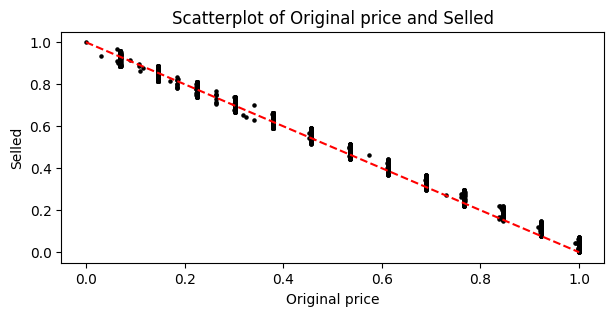

In [23]:
fig, ax = plt.subplots(1,1, figsize=(7,3))
# import seaborn as sns
# sns.scatterplot(data=games_df, x="original_price", y="selled", color='black', s=5)
ax.scatter(x=games_df.original_price,
           y=games_df.selled, 
           color = 'black', 
           s = 5
)

ax.set_xlabel('Original price')
ax.set_ylabel('Selled')
ax.set_title('Scatterplot of Original price and Selled')
ax.plot(np.flip(np.arange(0,2)), color = 'r', linestyle = '--')

__Задание 5__. Для каждого описания из столбца `game_description` таблицы `games_df` выясните, сколько в нем содержится предложений и слов. Добавьте 2 столбца: `n_words` и `n_sents`. В столбце  `n_words` укажите количество слов в описании. В столбце `n_sents` укажите количество предложений в описании. Для тех описаний, в которых больше 30 предложений, найдите топ-5 самых часто используемых слов.

In [24]:
from nltk.tokenize import RegexpTokenizer
word_tokenizer = RegexpTokenizer(r"\w+")

In [25]:
games_df['n_words'] = games_df.game_description.apply(lambda i: int(len(word_tokenizer.tokenize(i))) if(i !=None) else 0)
games_df.n_words.head(1)

0    241
Name: n_words, dtype: int64

In [26]:
from nltk import sent_tokenize
games_df['n_sent'] = games_df.game_description.apply(lambda i: int(len(sent_tokenize(i))) if(i !=None) else 0)
games_df.n_sent.head(1)

0    20
Name: n_sent, dtype: int64

In [27]:
from collections import Counter
results = Counter()
games_df[games_df.n_sent>30]['game_description'].apply(lambda i: word_tokenizer.tokenize(i)).apply(results.update)
results.most_common(5)

[('the', 7074), ('and', 4533), ('to', 4116), ('of', 3760), ('a', 3034)]

__Задание 6__. Пересортируйте столбцы таблицы `games_df` по следующему правилу: сначала идут нечисловые столбцы, за ними идут числовые столбцы. Добавьте перед первым числовым столбцом пустой безымянный столбец. Сохраните текущее состояние `games_df` в рабочую книгу "games.xlsx". При помощи механизма группировки столбцов, который предоставляет Excel, создайте 2 группы столбцов: группу нечисловых столбцов и группу числовых столбцов.
Вставьте в ноутбук скриншоты листов Excel, подтверждающие корректность выполнения задания.

* Примечание 1: в интерфейсе Excel механизм группировки находится в разделе "Структура" на вкладке "Данные". Пустой столбец нужен для того, чтобы группы столбцов не сливались в одну.
* Примечание 2: вам может потребоваться преобразовать номер столбца в букву. Для этих целей можно воспользоваться функцией `xlsxwriter.utility.xl_col_to_name`.

In [28]:
games_df.head()

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,n_games_of_dev,n_words,n_sent
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,0.730229,1,241,20
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,None,"Jun 3, 2016","SmiteWorks USA, LLC",None,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,None,very positive,12492,"[Indie, RPG, Strategy]",51,87,0.264597,191,200,10
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,None,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,$120.71,neutral,8573,[Racing],80,27,NaN,6,0,0
5,https://store.steampowered.com/app/946980/Awak...,app,Awakening of Dragon,Awakening of Dragon是一款龙题材、西方魔幻ARPG+MMO手游，游戏的一切...,"Sep 20, 2018",Double G,"Double G,Double G",[RPG],"[Online Multi-Player, Profile Features Limited...","[{'lang': 'Simplified Chinese', 'rank': 0}, {'...",...,None,very negative,12619,[RPG],23,92,NaN,1,24,1
7,https://store.steampowered.com/app/341780/Chro...,app,Chronicles of a Dark Lord: Episode II War of T...,Experience the 30+ hour long continuation of t...,"Jan 16, 2015",Kisareth Studios,"Kisareth Studios,Kisareth Studios","[RPG, Indie, RPGMaker, Turn-Based, Villain Pro...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}]",...,$5.21,positive,11983,"[Indie, RPG]",29,46,0.871397,3,190,12


In [30]:
games_df = games_df[games_df.dtypes.sort_values(ascending = False).index]
games_df.head()

,url,game_details,name,desc_snippet,release_date,languages,publisher,popular_tags,developer,recommended_requirements,...,reviews_mood,genres,original_price,selled,reviews_cnt,avg_rating_users,avg_rating_critics,n_games_of_dev,n_words,n_sent
0,https://store.steampowered.com/app/959410/The_...,"[Single-player, Profile Features Limited \r\n\...",The Endless Empty,A surreal post-life adventure,"Nov 3, 2018","[{'lang': 'English', 'rank': 0}]","Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...",Erik Sheader-Smith,"Recommended:,OS:,Windows Xp / Vista / 7,Proces...",...,positive,"[Adventure, Indie, RPG]",0.301784,0.730229,6952,77,63,1,241,20
3,https://store.steampowered.com/app/484940/Fant...,"[Multi-player, Co-op, Cross-Platform Multiplay...",Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,None,"Jun 3, 2016","[{'lang': 'English', 'rank': 0}]",None,"[Strategy, RPG, Indie]","SmiteWorks USA, LLC","Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",...,very positive,"[Indie, RPG, Strategy]",0.767261,0.264597,12492,51,87,191,200,10
4,https://store.steampowered.com/bundle/5044/WRC...,"[Single-player, Multi-player, Online Multi-Pla...",WRC Collection,WRC Collection bundle,None,"[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",Bigben Interactive,[],KT Racing,None,...,neutral,[Racing],NaN,NaN,8573,80,27,6,0,0
5,https://store.steampowered.com/app/946980/Awak...,"[Online Multi-Player, Profile Features Limited...",Awakening of Dragon,Awakening of Dragon是一款龙题材、西方魔幻ARPG+MMO手游，游戏的一切...,"Sep 20, 2018","[{'lang': 'Simplified Chinese', 'rank': 0}, {'...","Double G,Double G",[RPG],Double G,None,...,very negative,[RPG],NaN,NaN,12619,23,92,1,24,1
7,https://store.steampowered.com/app/341780/Chro...,"[Single-player, Steam Achievements, Full contr...",Chronicles of a Dark Lord: Episode II War of T...,Experience the 30+ hour long continuation of t...,"Jan 16, 2015","[{'lang': 'English', 'rank': 0}]","Kisareth Studios,Kisareth Studios","[RPG, Indie, RPGMaker, Turn-Based, Villain Pro...",Kisareth Studios,None,...,positive,"[Indie, RPG]",0.146625,0.871397,11983,29,46,3,190,12


In [31]:
games_df.dtypes

url                          object
game_details                 object
name                         object
desc_snippet                 object
release_date                 object
languages                    object
publisher                    object
popular_tags                 object
developer                    object
recommended_requirements     object
game_description             object
minimum_requirements         object
types                        object
discount_price               object
reviews_mood                 object
genres                       object
original_price              float64
selled                      float64
reviews_cnt                   int64
avg_rating_users              int64
avg_rating_critics            int64
n_games_of_dev                int64
n_words                       int64
n_sent                        int64
dtype: object

In [23]:
loc = games_df.dtypes
games_df.insert(loc =games_df.columns.get_loc(loc[loc != 'object'].index[0]),column = "",value="")

In [24]:
writer = pd.ExcelWriter(path+"games.xlsx", engine='xlsxwriter')
games_df.to_excel(writer,sheet_name = 'games', index= False)

In [25]:
workbook  = writer.book
worksheet = writer.sheets['games']

In [32]:
from xlsxwriter.utility import xl_col_to_name
first_num_col = games_df.columns.get_loc(loc[loc != "object"].index[0])
column_list = [ xl_col_to_name(i, False) for i in range(len(games_df.dtypes))]
col_of_object = f'{column_list[0]}:{column_list[first_num_col-2]}'
col_of_num = f'{column_list[first_num_col]}:{column_list[-1]}'

NameError: name 'loc' is not defined

In [28]:
worksheet.set_column(col_of_object, None, None, {'level': 1})
worksheet.set_column(col_of_num, None, None, {'level': 1})

0

In [29]:
writer.save()

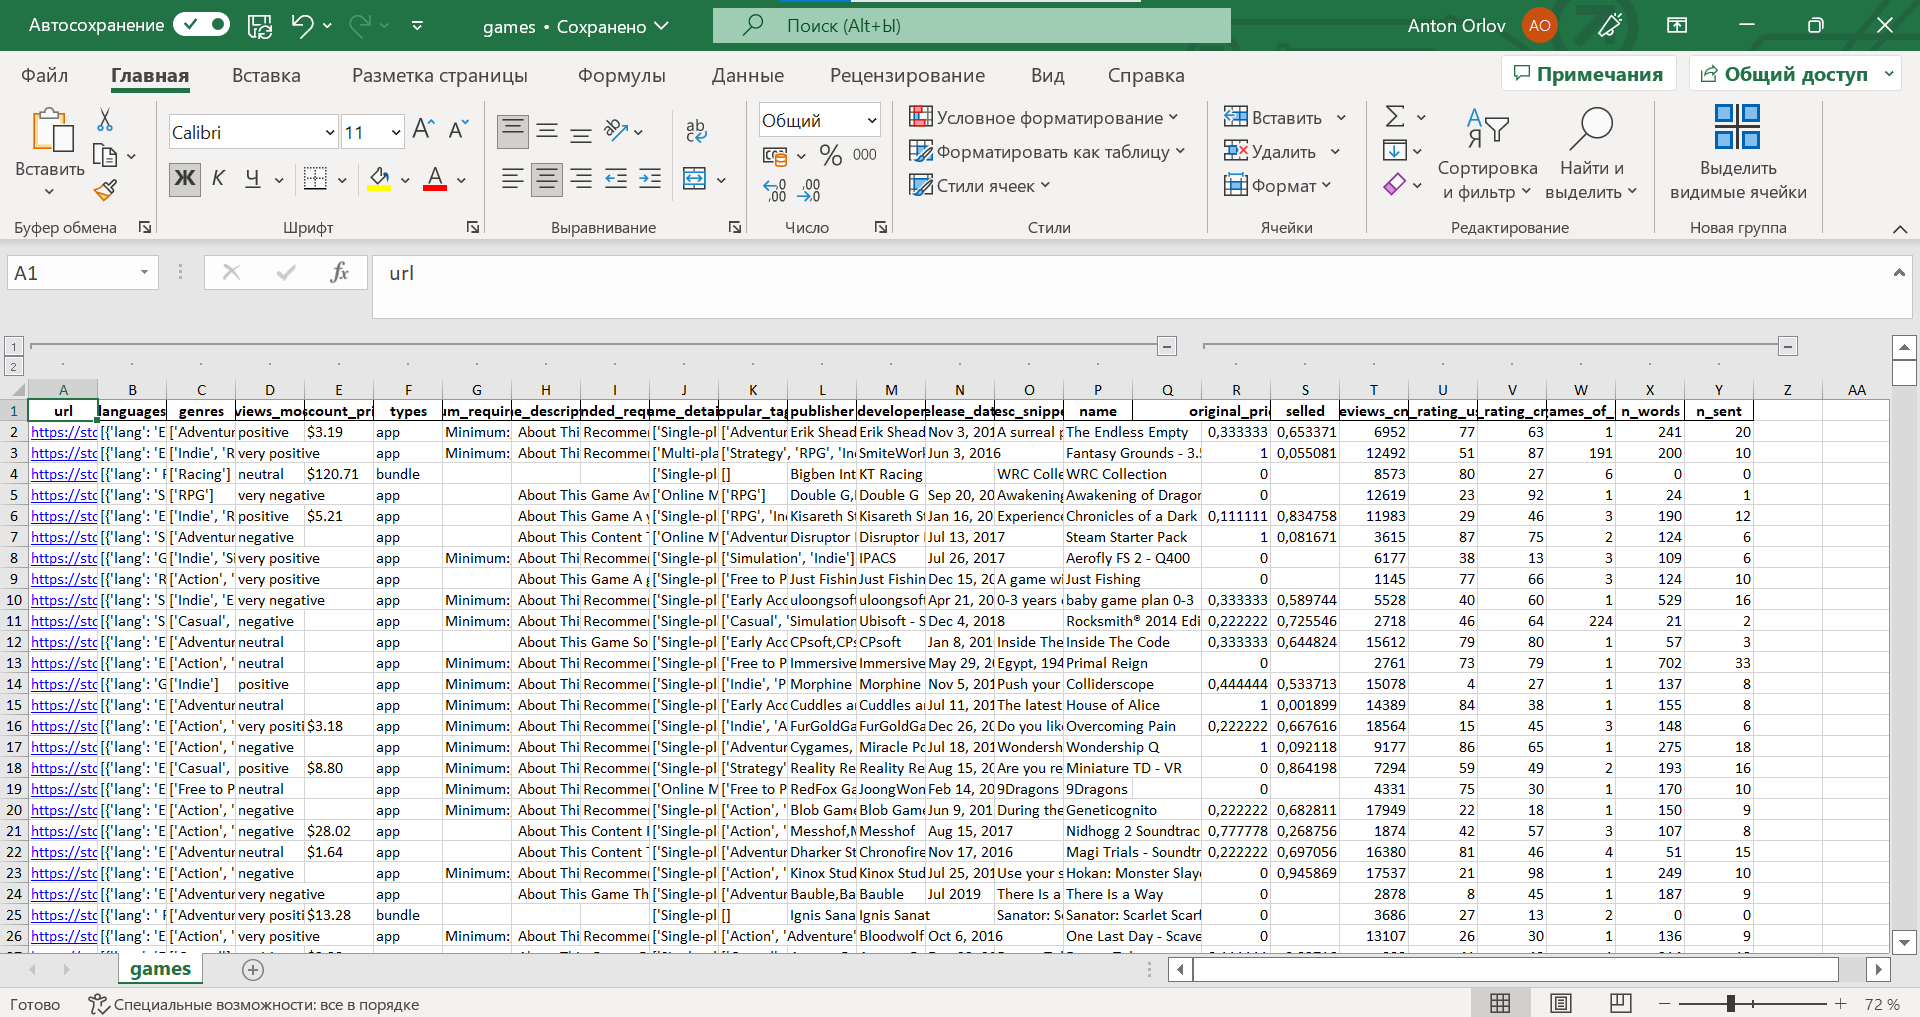